In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('../../Resources/donneeSite.xlsx')
data

,Insee,Code_postal,Ville,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,...,Pharmacie,Maternelle,Primaire,Collège,Lycée,Securite,Education,Loisir / Sport,Environnement,Pratique
0,1001,1400,L'Abergement-Clémenciat,767,16 km²,48 h/km²,49%,4.3%,22 228 €/an,1 938 €,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
1,1002,1640,L'Abergement-de-Varey,241,9 km²,27 h/km²,50.6%,4.1%,22 883 €/an,1 130 €,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,1004,1500,Ambérieu-en-Bugey,14 127,25 km²,565 h/km²,47.5%,7.5%,19 735 €/an,2 005 €,...,6,5,4,2,2,4.0,3.8,3.8,4.0,3.3
3,1005,1330,Ambérieux-en-Dombes,1 619,16 km²,101 h/km²,51.8%,4.1%,23 183 €/an,2 442 €,...,1,1,1,0,0,5.0,5.0,3.0,3.0,3.0
4,1006,1300,Ambléon,109,6 km²,18 h/km²,52.3%,7.3%,NC,1 155 €,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33656,95676,95510,Villers-en-Arthies,508,8 km²,64 h/km²,51%,4.1%,26 675 €/an,2 150 €,...,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
33657,95678,95840,Villiers-Adam,851,10 km²,85 h/km²,47.7%,4.1%,28 405 €/an,3 343 €,...,0,1,1,0,0,4.0,4.0,3.0,4.0,3.5
33658,95680,95400,Villiers-le-Bel,27 564,7 km²,3 938 h/km²,43.9%,9.6%,14 323 €/an,2 449 €,...,9,12,12,5,2,1.8,2.3,3.6,2.0,3.0
33659,95682,95720,Villiers-le-Sec,179,3 km²,60 h/km²,55.3%,6.7%,25 444 €/an,2 741 €,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


# Formattage des données

Certaines villes ont des valeurs qui n'ont pas été renseignées sur le site, On va donc retirer ces données (~ 3000 villes, soit ~15% du jeu de donnée)

In [3]:
data = data[~data['Prix_moyen'].str.contains('NC')]
data = data[~data['Revenu_moyen'].str.contains('NC')]
data

,Insee,Code_postal,Ville,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,...,Pharmacie,Maternelle,Primaire,Collège,Lycée,Securite,Education,Loisir / Sport,Environnement,Pratique
0,1001,1400,L'Abergement-Clémenciat,767,16 km²,48 h/km²,49%,4.3%,22 228 €/an,1 938 €,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
1,1002,1640,L'Abergement-de-Varey,241,9 km²,27 h/km²,50.6%,4.1%,22 883 €/an,1 130 €,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,1004,1500,Ambérieu-en-Bugey,14 127,25 km²,565 h/km²,47.5%,7.5%,19 735 €/an,2 005 €,...,6,5,4,2,2,4.0,3.8,3.8,4.0,3.3
3,1005,1330,Ambérieux-en-Dombes,1 619,16 km²,101 h/km²,51.8%,4.1%,23 183 €/an,2 442 €,...,1,1,1,0,0,5.0,5.0,3.0,3.0,3.0
5,1007,1500,Ambronay,2 615,34 km²,77 h/km²,49.3%,4.2%,21 987 €/an,1 963 €,...,1,1,1,0,0,3.0,4.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33656,95676,95510,Villers-en-Arthies,508,8 km²,64 h/km²,51%,4.1%,26 675 €/an,2 150 €,...,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
33657,95678,95840,Villiers-Adam,851,10 km²,85 h/km²,47.7%,4.1%,28 405 €/an,3 343 €,...,0,1,1,0,0,4.0,4.0,3.0,4.0,3.5
33658,95680,95400,Villiers-le-Bel,27 564,7 km²,3 938 h/km²,43.9%,9.6%,14 323 €/an,2 449 €,...,9,12,12,5,2,1.8,2.3,3.6,2.0,3.0
33659,95682,95720,Villiers-le-Sec,179,3 km²,60 h/km²,55.3%,6.7%,25 444 €/an,2 741 €,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


Certaines colonnes doivent être transformées en valeurs numériques pour être exploitables

In [4]:
data['Nb_habitants'] = data['Nb_habitants'].str.replace(' ', '')
data['Superficie'] = data['Superficie'].str.replace('km²', '')
data['Superficie'] = data['Superficie'].str.replace(' ', '')
data['Pop_densite'] = data['Pop_densite'].str.replace('h/km²', '')
data['Pop_densite'] = data['Pop_densite'].str.replace(' ', '')
data['Pop_active'] = data['Pop_active'].str.replace('%', '')
data['Taux_chomage'] = data['Taux_chomage'].str.replace('%', '')
data['Revenu_moyen'] = data['Revenu_moyen'].str.replace('€/an', '')
data['Revenu_moyen'] = data['Revenu_moyen'].str.replace(' ', '')
data['Prix_moyen'] = data['Prix_moyen'].str.replace('€', '')
data['Prix_moyen'] = data['Prix_moyen'].str.replace(' ', '')

In [5]:
data.astype({'Nb_habitants': 'int64'})
data.astype({'Superficie': 'int64'})
data.astype({'Pop_densite': 'int64'})
data.astype({'Pop_active': 'float64'})
data.astype({'Taux_chomage': 'float64'})
data.astype({'Revenu_moyen': 'int64'})
data.astype({'Prix_moyen': 'int64'})
data

,Insee,Code_postal,Ville,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,...,Pharmacie,Maternelle,Primaire,Collège,Lycée,Securite,Education,Loisir / Sport,Environnement,Pratique
0,1001,1400,L'Abergement-Clémenciat,767,16,48,49,4.3,22228,1938,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
1,1002,1640,L'Abergement-de-Varey,241,9,27,50.6,4.1,22883,1130,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,1004,1500,Ambérieu-en-Bugey,14127,25,565,47.5,7.5,19735,2005,...,6,5,4,2,2,4.0,3.8,3.8,4.0,3.3
3,1005,1330,Ambérieux-en-Dombes,1619,16,101,51.8,4.1,23183,2442,...,1,1,1,0,0,5.0,5.0,3.0,3.0,3.0
5,1007,1500,Ambronay,2615,34,77,49.3,4.2,21987,1963,...,1,1,1,0,0,3.0,4.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33656,95676,95510,Villers-en-Arthies,508,8,64,51,4.1,26675,2150,...,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
33657,95678,95840,Villiers-Adam,851,10,85,47.7,4.1,28405,3343,...,0,1,1,0,0,4.0,4.0,3.0,4.0,3.5
33658,95680,95400,Villiers-le-Bel,27564,7,3938,43.9,9.6,14323,2449,...,9,12,12,5,2,1.8,2.3,3.6,2.0,3.0
33659,95682,95720,Villiers-le-Sec,179,3,60,55.3,6.7,25444,2741,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [6]:
# On sépare les données labélisées de celles non labélisées.

data_with_mark = data[~data['Note_global'].isna()]
data_without_mark = data[data['Note_global'].isna()]

In [7]:
labels = ['Note_global', 'Securite', 'Education', 'Loisir / Sport', 'Environnement', 'Pratique']
ids = ['Insee', 'Code_postal', 'Ville']
villes_train = data_with_mark.loc[:, data_with_mark.columns.isin(ids)].values
values_train_df = data_with_mark.loc[:, ~data_with_mark.columns.isin(labels)]
values_train_df = values_train_df.loc[:, ~values_train_df.columns.isin(ids)]
values_train = values_train_df.values
status_train = data_with_mark.loc[:, data_with_mark.columns.isin(labels)].values

status_global = data_with_mark.iloc[:, 10].values
status_without_global = data_with_mark.iloc[:, -5:].values
status_secu = data_with_mark.loc[:, data_with_mark.columns.isin(['Securite'])].values
status_edu = data_with_mark.loc[:, data_with_mark.columns.isin(['Education'])].values
status_loisir = data_with_mark.loc[:, data_with_mark.columns.isin(['Loisir / Sport'])].values
status_env = data_with_mark.loc[:, data_with_mark.columns.isin(['Environnement'])].values
status_pratique  =data_with_mark.loc[:, data_with_mark.columns.isin(['Pratique'])].values

villes_test = data_without_mark.loc[:, data_without_mark.columns.isin(ids)].values
values_test_df = data_without_mark.loc[:, ~data_without_mark.columns.isin(labels)]
values_test_df = values_test_df.loc[:, ~values_test_df.columns.isin(ids)]
values_test = values_test_df.values

### Split des données en données  d'entrainement et données de test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train_global, Y_test_global = train_test_split(values_train,status_global, test_size=.5, random_state=1)
Y_train_without_global, Y_test_without_global = train_test_split(status_without_global, test_size=.5, random_state=1)
Y_train_secu, Y_test_secu = train_test_split(status_secu, test_size=.5, random_state=1)
Y_train_edu, Y_test_edu = train_test_split(status_edu, test_size=.5, random_state=1)
Y_train_loisir, Y_test_loisir = train_test_split(status_loisir, test_size=.5, random_state=1)
Y_train_env, Y_test_env = train_test_split(status_env, test_size=.5, random_state=1)
Y_train_pratique, Y_test_pratique = train_test_split(status_pratique, test_size=.5, random_state=1)

# Normalisation

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=0)
svd.fit(X_train_norm)
X_train_svd = svd.transform(X_train_norm)
X_test_svd = svd.transform(X_test_norm)

# Fonctions

In [13]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [14]:
def get_metrics(status, status_predicted, dt_note):
    print('RMSE for {0} : {1:.3f}'.format(dt_note, mean_squared_error(status, status_predicted, squared=False))) 
    print('MSE for {0} : {1:.3f}'.format(dt_note, mean_squared_error(status, status_predicted, squared=True))) 

def show_plt_bar(importance, values_train_df):
    # plot feature importance
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    plt.bar([values_train_df.columns[x] for x in range(len(importance))], importance)
    plt.show()

def get_importance(model, X, Y):
    results = permutation_importance(model, X, Y, scoring='neg_mean_squared_error')
    return results.importances_mean

# KNeighborsRegression

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
KNR = KNeighborsRegressor(n_neighbors=5)

In [18]:
# Multi-target prediction
KNR.fit(X_train_svd, Y_train_without_global)
status_without_global_predicted = KNR.predict(X_test_svd)

get_metrics(Y_test_without_global, status_without_global_predicted, 'Notes')

RMSE for Notes : 1.107
MSE for Notes : 1.239


RMSE for Note_global : 0.843
MSE for Note_global : 0.710


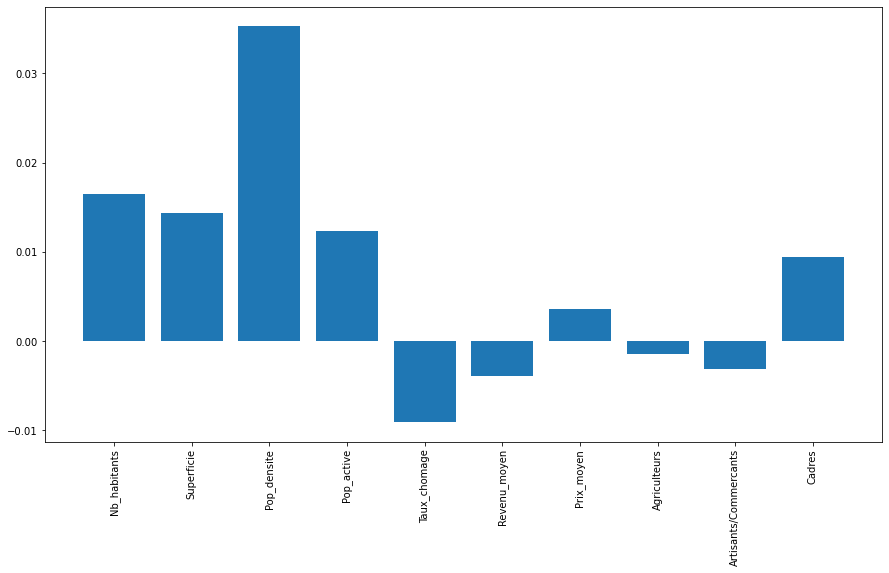

In [19]:
# Prédiction de la Note_Globale
KNR.fit(X_train_svd, Y_train_global)
status_global_predicted = KNR.predict(X_test_svd)

get_metrics(Y_test_global, status_global_predicted, 'Note_global')
show_plt_bar(get_importance(KNR,X_test_svd, Y_test_global), values_train_df)

RMSE for Securite : 0.948
MSE for Securite : 0.898


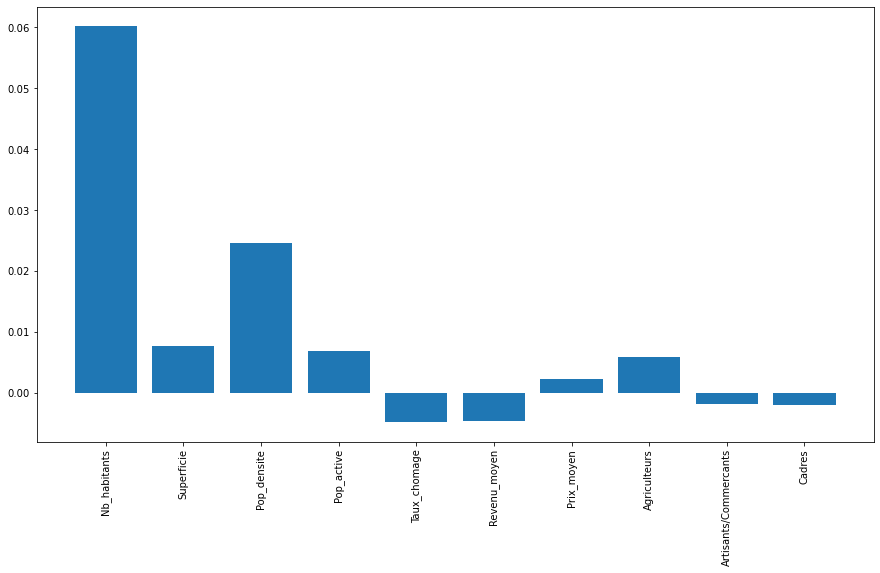

In [20]:
# Prédiction de la note Sécurité
KNR.fit(X_train_svd, Y_train_secu)
status_secu_predicted = KNR.predict(X_test_svd)

get_metrics(Y_test_secu, status_secu_predicted, 'Securite')
show_plt_bar(get_importance(KNR,X_test_svd, Y_test_secu), values_train_df)

RMSE for Education : 1.070
MSE for Education : 1.146


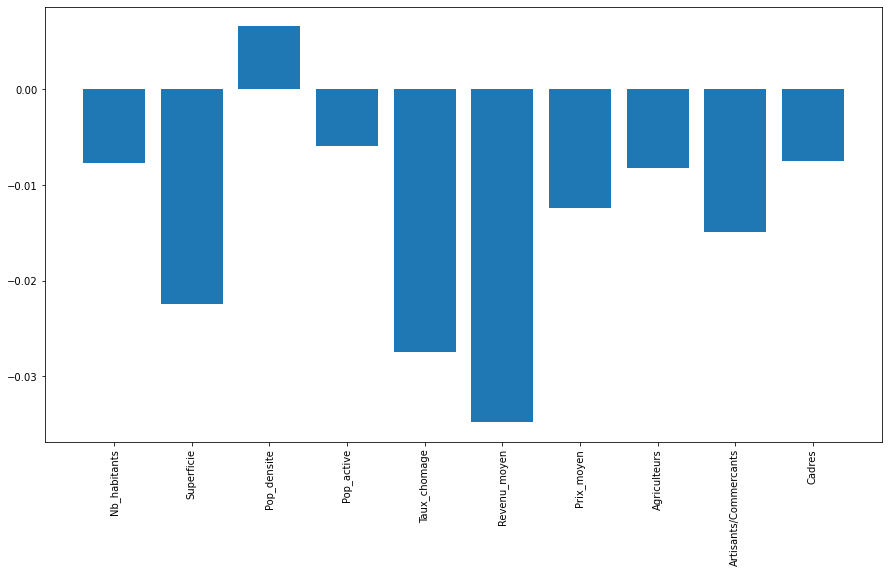

In [21]:
# Prédiction de la note Education
KNR.fit(X_train_svd, Y_train_edu)
status_edu_predicted = KNR.predict(X_test_svd)

get_metrics(Y_test_edu, status_edu_predicted, 'Education')
show_plt_bar(get_importance(KNR,X_test_svd, Y_test_secu), values_train_df)

RMSE for Loisir / Sport : 1.187
MSE for Loisir / Sport : 1.408


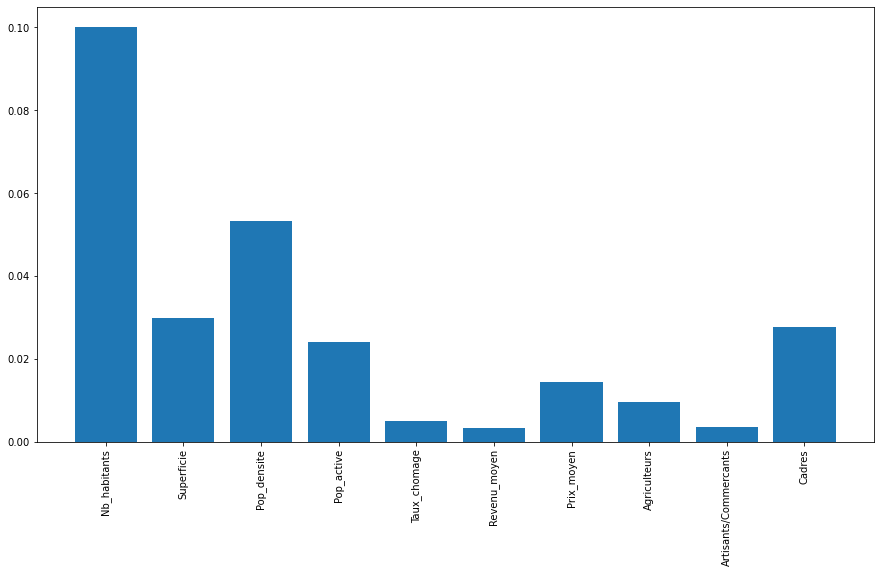

In [22]:
# Prédiction de la note Sport / Loisir
KNR.fit(X_train_svd, Y_train_loisir)
status_loisir_predicted = KNR.predict(X_test_svd)

get_metrics(Y_test_loisir, status_loisir_predicted, 'Loisir / Sport')
show_plt_bar(get_importance(KNR,X_test_svd, Y_test_loisir), values_train_df)

RMSE for Environnement : 1.041
MSE for Environnement : 1.083


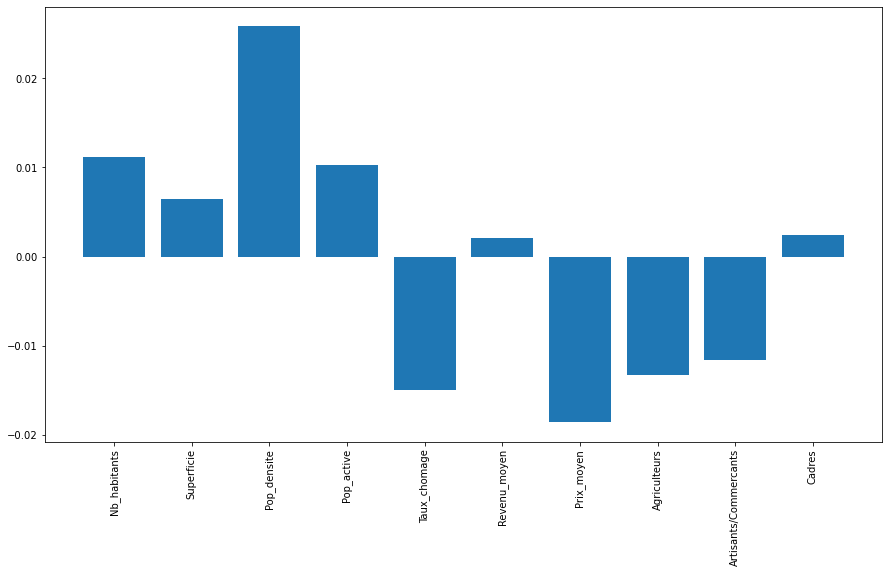

In [23]:
# Prédiction de la note Environnement
KNR.fit(X_train_svd, Y_train_env)
status_env_predicted = KNR.predict(X_test_svd)

get_metrics(Y_test_env, status_env_predicted, 'Environnement')
show_plt_bar(get_importance(KNR,X_test_svd, Y_test_env), values_train_df)

RMSE for Pratique : 1.287
MSE for Pratique : 1.658


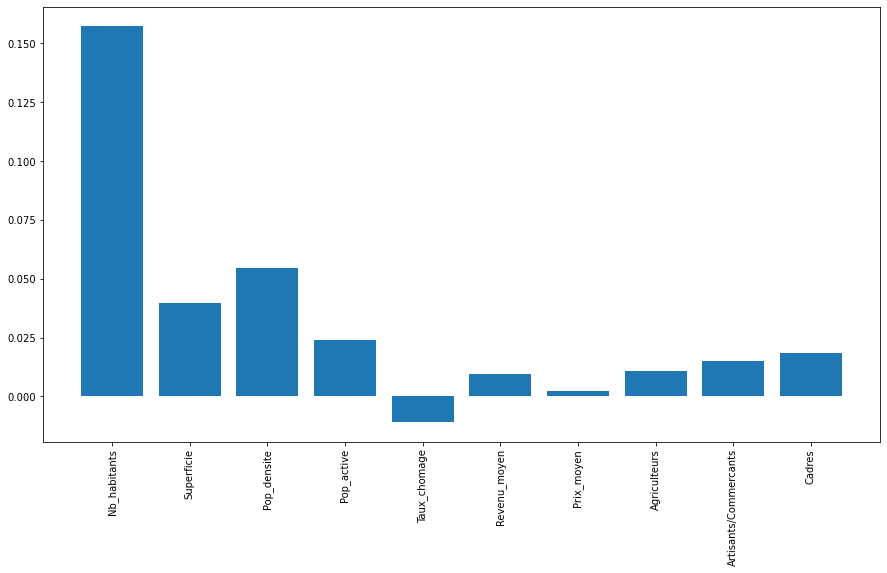

In [24]:
# Prédiction de la note Vie pratique
KNR.fit(X_train_svd, Y_train_pratique)
status_pratique_predicted = KNR.predict(X_test_svd)

get_metrics(Y_test_pratique, status_pratique_predicted, 'Pratique')
show_plt_bar(get_importance(KNR,X_test_svd, Y_test_pratique), values_train_df)

# Random forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
regr = RandomForestRegressor(max_depth = 15, random_state=0)

In [27]:
# Multi-target prediction
regr.fit(X_train_svd, Y_train_without_global)
status_without_global_predicted = regr.predict(X_test_svd)

get_metrics(Y_test_without_global, status_without_global_predicted, 'Notes')

RMSE for Notes : 1.029
MSE for Notes : 1.071


RMSE for Note_global : 0.787
MSE for Note_global : 0.620


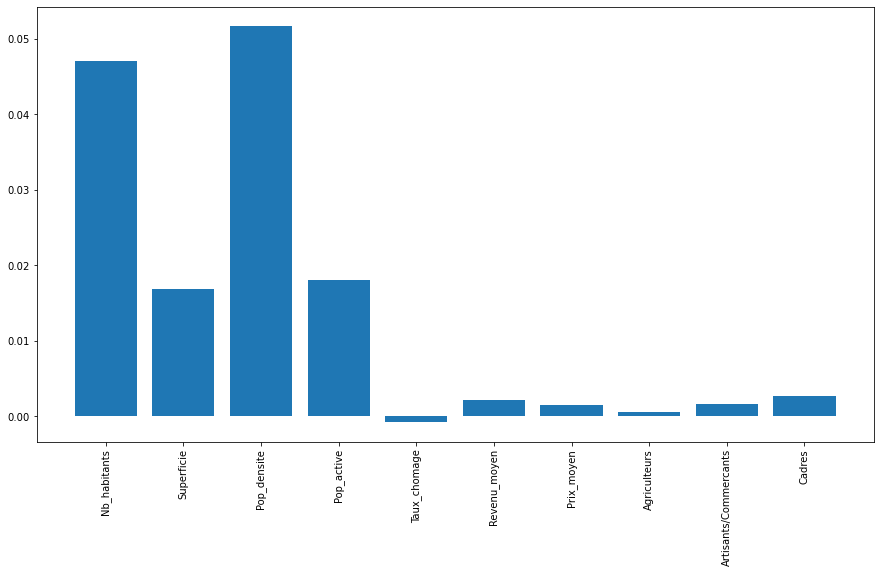

In [28]:
# Prédiction de la note globale
regr.fit(X_train_svd, Y_train_global)
status_global_predicted = regr.predict(X_test_svd)

get_metrics(Y_test_global, status_global_predicted, 'Note_global')
show_plt_bar(get_importance(regr,X_test_svd, Y_test_global), values_train_df)

/tmp/ipykernel_11109/1680717998.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_svd, Y_train_secu)


RMSE for Securite : 0.883
MSE for Securite : 0.780


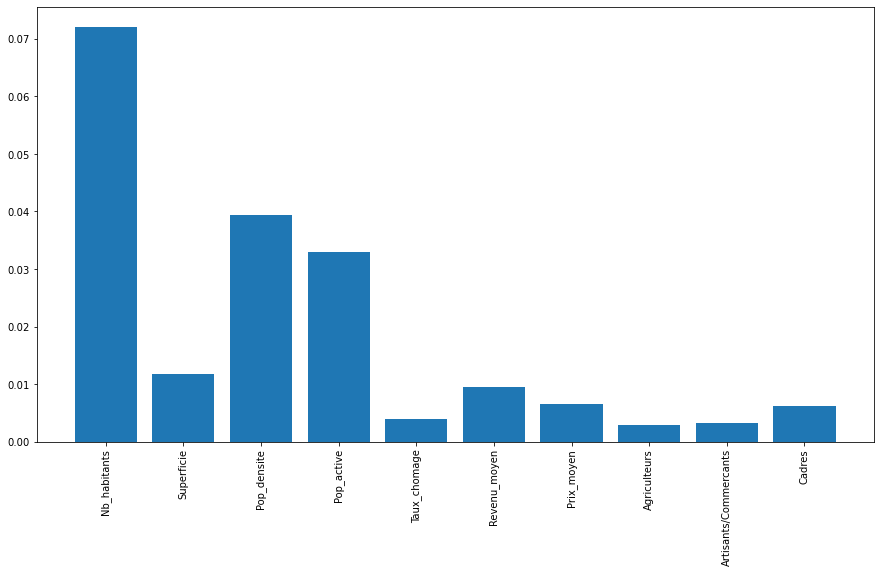

In [29]:
# Prédiction de la note Sécurité
regr.fit(X_train_svd, Y_train_secu)
status_secu_predicted = regr.predict(X_test_svd)

get_metrics(Y_test_secu, status_secu_predicted, 'Securite')
show_plt_bar(get_importance(regr,X_test_svd, Y_test_secu), values_train_df)

/tmp/ipykernel_11109/556696487.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_svd, Y_train_edu)


RMSE for Education : 1.006
MSE for Education : 1.011


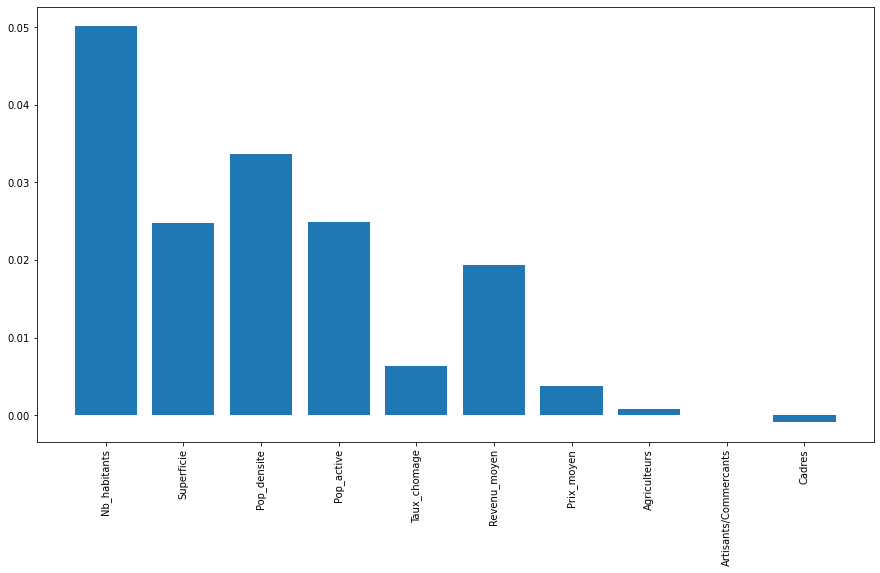

In [30]:
# Prédiction de la note Education
regr.fit(X_train_svd, Y_train_edu)
status_edu_predicted = regr.predict(X_test_svd)

get_metrics(Y_test_edu, status_edu_predicted, 'Education')
show_plt_bar(get_importance(regr,X_test_svd, Y_test_edu), values_train_df)

/tmp/ipykernel_11109/2672449065.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_svd, Y_train_loisir)


RMSE for Loisir / Sport : 1.110
MSE for Loisir / Sport : 1.233


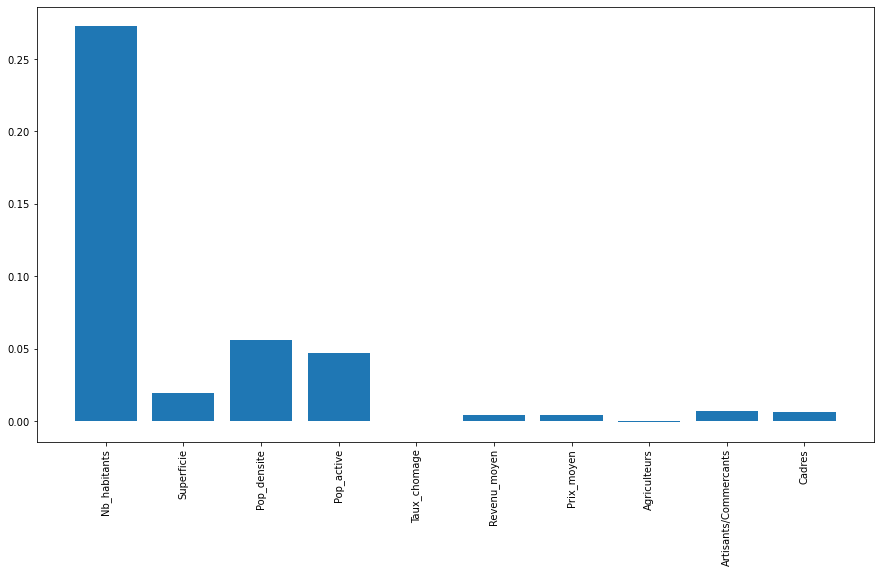

In [31]:
# Prédiction de la note Sports / Loisir
regr.fit(X_train_svd, Y_train_loisir)
status_loisir_predicted = regr.predict(X_test_svd)

get_metrics(Y_test_loisir, status_loisir_predicted, 'Loisir / Sport')
show_plt_bar(get_importance(regr,X_test_svd, Y_test_loisir), values_train_df)

/tmp/ipykernel_11109/3085280040.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_svd, Y_train_env)


RMSE for Environnement : 0.971
MSE for Environnement : 0.943


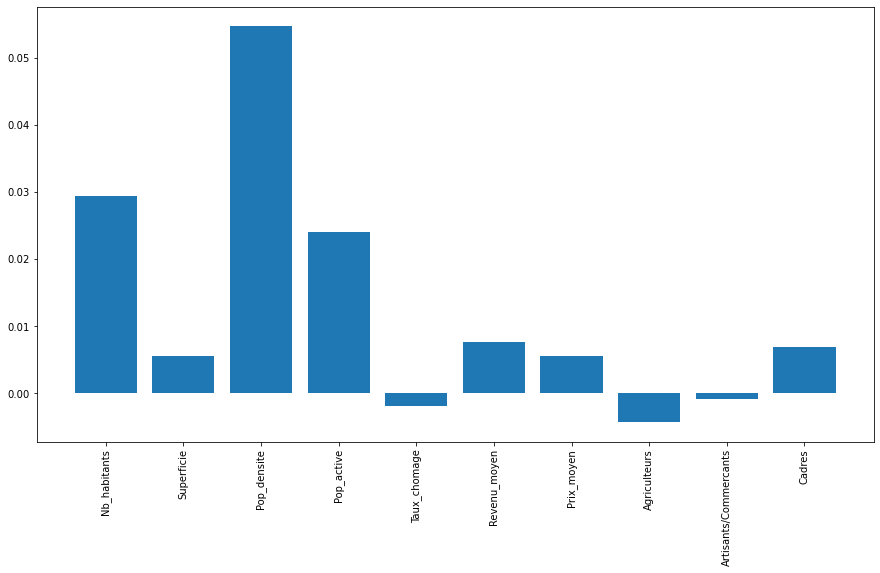

In [32]:
# Prédiction de la note Environnement
regr.fit(X_train_svd, Y_train_env)
status_env_predicted = regr.predict(X_test_svd)

get_metrics(Y_test_env, status_env_predicted, 'Environnement')
show_plt_bar(get_importance(regr,X_test_svd, Y_test_env), values_train_df)

/tmp/ipykernel_11109/1902663622.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train_svd, Y_train_pratique)


RMSE for Pratique : 1.203
MSE for Pratique : 1.447


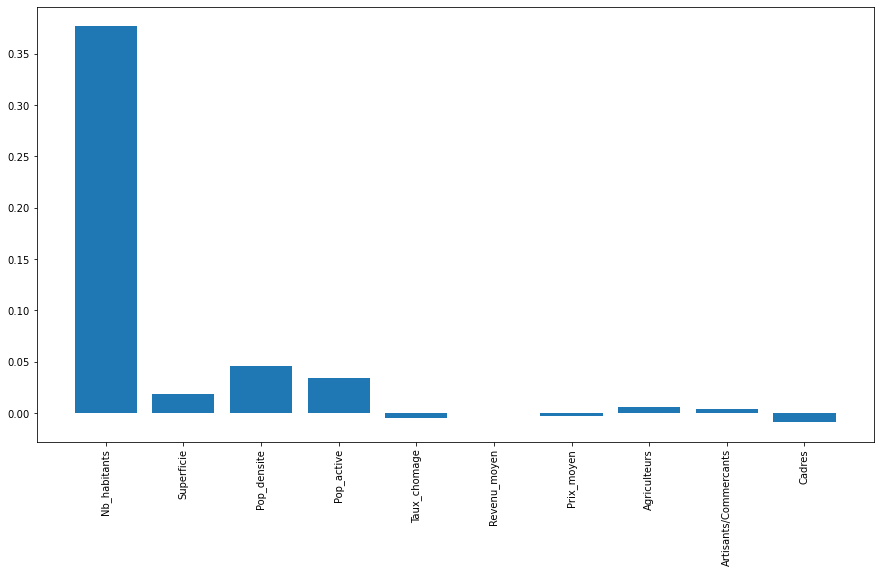

In [33]:
# Prédiction de la note Vie Pratique
regr.fit(X_train_svd, Y_train_pratique)
status_pratique_predicted = regr.predict(X_test_svd)

get_metrics(Y_test_pratique, status_pratique_predicted, 'Pratique')
show_plt_bar(get_importance(regr,X_test_svd, Y_test_pratique), values_train_df)

# MLP

In [34]:
from sklearn.neural_network import MLPRegressor

In [35]:
mlp = MLPRegressor(random_state=1, max_iter=1000)

In [36]:
# Multi-target prediction
mlp.fit(X_train_svd, Y_train_without_global)
status_without_global_predicted = mlp.predict(X_test_svd)

get_metrics(Y_test_without_global, status_without_global_predicted, 'Notes')

RMSE for Notes : 1.034
MSE for Notes : 1.082


RMSE for Note_global : 0.810
MSE for Note_global : 0.656


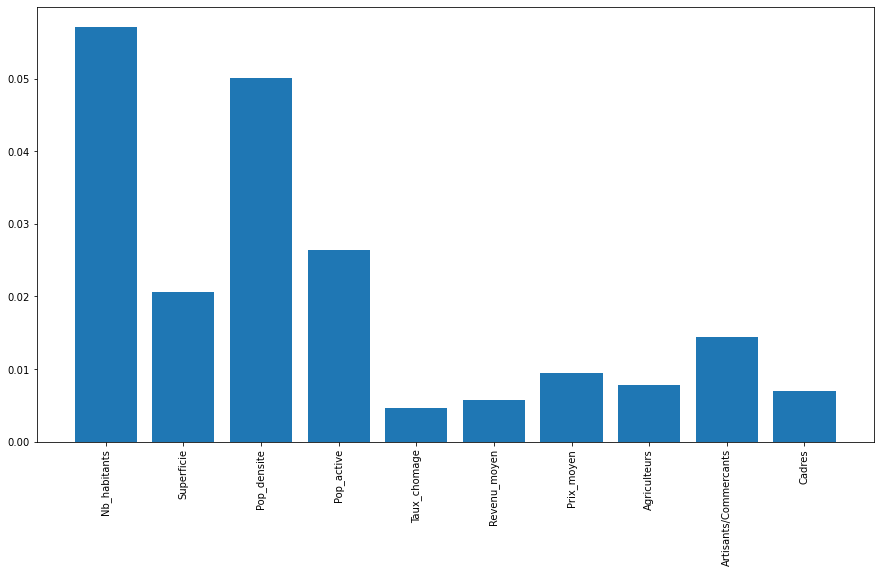

In [37]:
# Prédiction de la note globale
mlp.fit(X_train_svd, Y_train_global)
status_global_predicted = mlp.predict(X_test_svd)

get_metrics(Y_test_global, status_global_predicted, 'Note_global')
show_plt_bar(get_importance(mlp,X_test_svd, Y_test_global), values_train_df)

/home/nguyenthomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RMSE for Securite : 0.885
MSE for Securite : 0.783


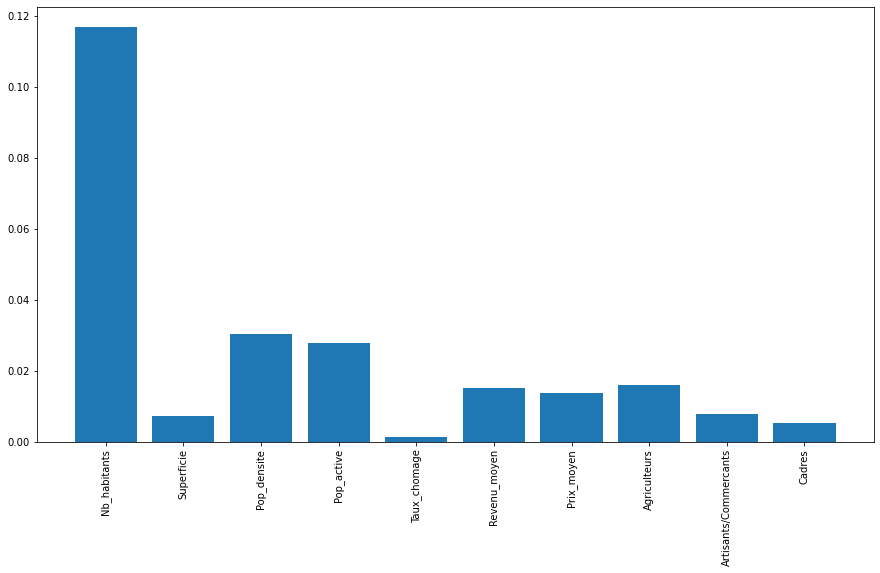

In [38]:
# Prédiction de la note Sécurité
mlp.fit(X_train_svd, Y_train_secu)
status_secu_predicted = mlp.predict(X_test_svd)

get_metrics(Y_test_secu, status_secu_predicted, 'Securite')
show_plt_bar(get_importance(mlp,X_test_svd, Y_test_secu), values_train_df)

/home/nguyenthomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RMSE for Education : 1.018
MSE for Education : 1.036


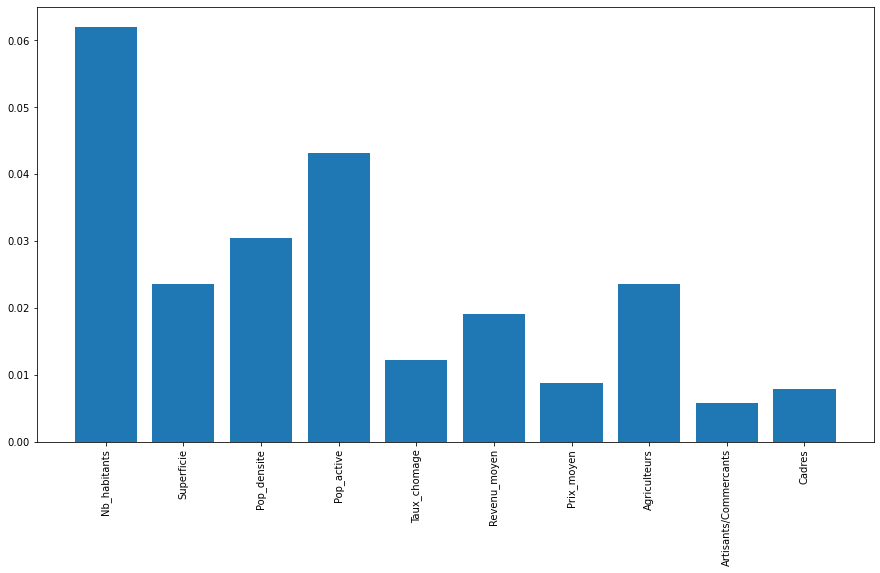

In [39]:
# Prédiction de la note Education
mlp.fit(X_train_svd, Y_train_edu)
status_edu_predicted = mlp.predict(X_test_svd)

get_metrics(Y_test_edu, status_edu_predicted, 'Education')
show_plt_bar(get_importance(mlp,X_test_svd, Y_test_edu), values_train_df)

/home/nguyenthomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RMSE for Loisir / Sport : 1.141
MSE for Loisir / Sport : 1.303


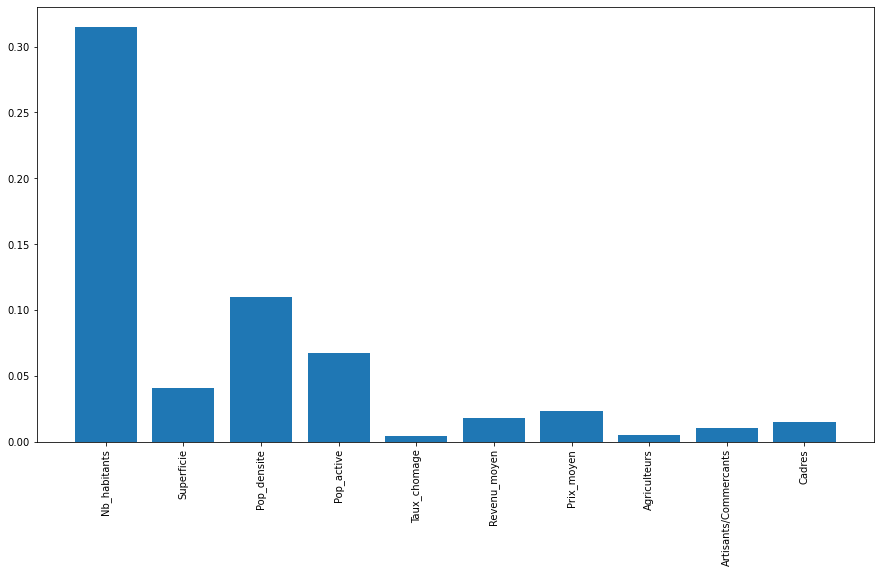

In [40]:
# Prédiction de la note Sports / Loisir
mlp.fit(X_train_svd, Y_train_loisir)
status_loisir_predicted = mlp.predict(X_test_svd)

get_metrics(Y_test_loisir, status_loisir_predicted, 'Loisir / Sport')
show_plt_bar(get_importance(mlp,X_test_svd, Y_test_loisir), values_train_df)

/home/nguyenthomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RMSE for Environnement : 0.978
MSE for Environnement : 0.957


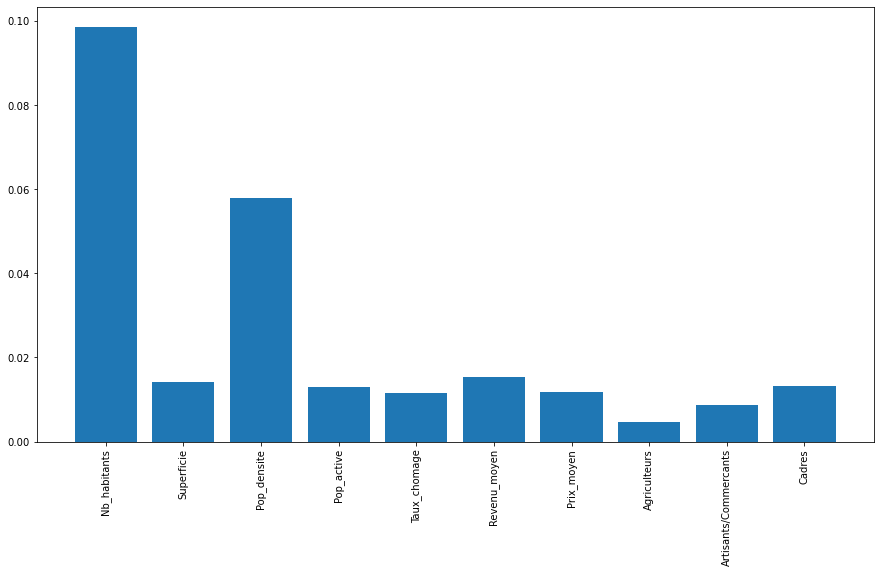

In [41]:
# Prédiction de la note Environnement
mlp.fit(X_train_svd, Y_train_env)
status_env_predicted = mlp.predict(X_test_svd)

get_metrics(Y_test_env, status_env_predicted, 'Environnement')
show_plt_bar(get_importance(mlp,X_test_svd, Y_test_env), values_train_df)

/home/nguyenthomas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RMSE for Pratique : 1.238
MSE for Pratique : 1.532


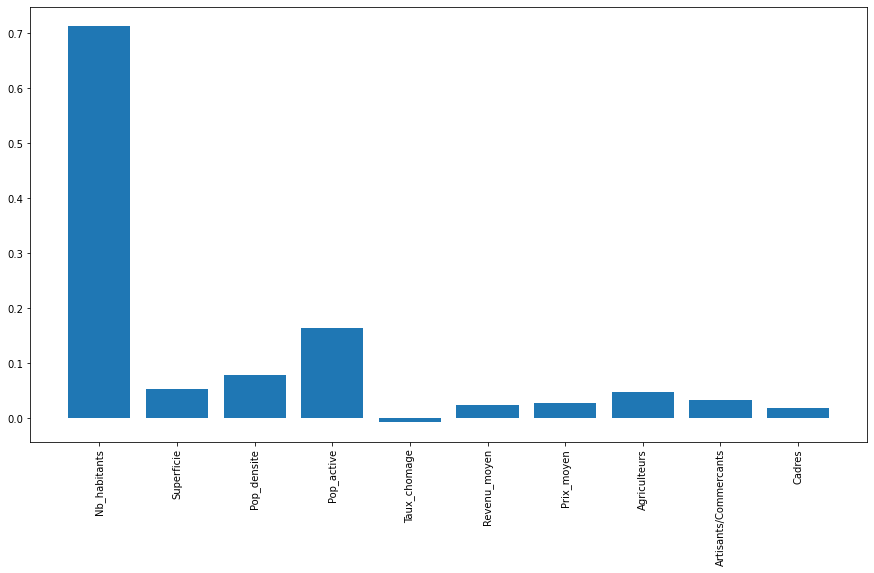

In [42]:
# Prédiction de la note Vie Pratique
mlp.fit(X_train_svd, Y_train_pratique)
status_pratique_predicted = mlp.predict(X_test_svd)

get_metrics(Y_test_pratique, status_pratique_predicted, 'Pratique')
show_plt_bar(get_importance(mlp,X_test_svd, Y_test_pratique), values_train_df)

# Prédiction des données 

On a choisi de garder RandomForest, qui a donné les résultats les plus proches de la réalité lors de notre test précédent (RMSE et MSE les plus bas)

On a choisi de prédire les notes détaillées et de calculer leur moyenne pour la note globale (même fonctionnement que sur le site)

In [47]:
X_train_norm = scaler.transform(values_train)
X_train_svd = svd.transform(X_train_norm)

X_predict_norm = scaler.transform(values_test)
X_predict_svd = svd.transform(X_predict_norm)

regr.fit(X_train_svd, status_without_global)
status_without_global_predicted = regr.predict(X_predict_svd)

In [52]:
data_predict_final = data_without_mark.copy()

labels = ['Securite', 'Education', 'Loisir / Sport', 'Environnement', 'Pratique']

data_predict_final[labels] = status_without_global_predicted
data_predict_final['Note_global'] = data_predict_final[labels].mean(axis=1)

data_complete = pd.concat([data_predict_final, data_with_mark])

data_complete

,Insee,Code_postal,Ville,Nb_habitants,Superficie,Pop_densite,Pop_active,Taux_chomage,Revenu_moyen,Prix_moyen,...,Pharmacie,Maternelle,Primaire,Collège,Lycée,Securite,Education,Loisir / Sport,Environnement,Pratique
0,1001,1400,L'Abergement-Clémenciat,767,16,48,49,4.3,22228,1938,...,0,1,1,0,0,3.911086,3.558193,2.821216,3.887152,2.729014
1,1002,1640,L'Abergement-de-Varey,241,9,27,50.6,4.1,22883,1130,...,0,0,0,0,0,4.000943,2.858437,2.041952,3.896197,2.057704
6,1008,1500,Ambutrix,747,5,149,55.6,4.1,24389,1940,...,1,1,1,0,0,3.952892,3.527048,2.613205,3.845822,2.364580
7,1009,1300,Andert-et-Condon,342,7,49,45.9,3.5,23071,966,...,0,0,0,0,0,3.928057,3.135487,2.560755,3.967928,2.642644
8,1010,1350,Anglefort,1133,29,39,48.4,4.7,22527,1970,...,0,1,1,0,0,4.043286,3.561482,2.921106,3.858988,2.705384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33650,95651,95780,Vétheuil,839,4,210,47.1,4.1,22573,2426,...,1,1,1,0,0,2.500000,3.000000,3.000000,4.000000,3.000000
33651,95652,95270,Viarmes,5213,8,652,48.6,4.8,25057,3000,...,2,2,2,1,0,5.000000,4.000000,2.500000,4.000000,2.500000
33654,95660,95570,Villaines-sous-Bois,764,2,382,54.1,4.3,27562,3258,...,0,1,1,0,0,5.000000,5.000000,4.500000,5.000000,3.500000
33657,95678,95840,Villiers-Adam,851,10,85,47.7,4.1,28405,3343,...,0,1,1,0,0,4.000000,4.000000,3.000000,4.000000,3.500000


In [53]:
data_complete.to_csv('data_with_score_prediction.csv')